In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from IPython.display import display
from tqdm.auto import tqdm
import opensmile

sys.path.append("..")
from cybb_mist.speech_analysis import analyze_utterance


torchvision is not available - cannot save figures


In [11]:
user = "jonas"

if user.lower() == "jonas":
    BASE_PATH = Path("/media/uz_study/EEGstudy2_idlab_cloud")
elif user.lower() == "mitchel":
    #     BASE_PATH = Path("Z:/shares/ghep_lab/2021_VanhollebekeKappen_EEGStudy2_MIST_Cyberball_Audio/")
    BASE_PATH = Path("D:/Data/EEG_Study_2")
DATA_PATH = BASE_PATH.joinpath("Data/Raw/Audio")

wavs = list(DATA_PATH.glob('**/*.wav'))
print(len(wavs))

623


## Creating images

In [4]:
img_save_dir = DATA_PATH.parent.parent / 'interim' / 'audio_images'
os.makedirs(img_save_dir, exist_ok=True)

opensmile.Smile(
        feature_set=opensmile.FeatureSet.GeMAPSv01b,
        feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
).feature_names


In [13]:
for wav_path in tqdm(wavs):
    ppt_id, task = wav_path.parent.name.split("_")[1:3]
    desc_type, exp_phase = wav_path.stem.split("_")[1:3]

    save_path = img_save_dir / str(ppt_id)
    os.makedirs(save_path, exist_ok=True)
    try:
        analyze_utterance(
            wav_path,
            feat_cols=[
                "F0semitoneFrom27.5Hz_sma3nz",
                "jitterLocal_sma3nz",
                "shimmerLocaldB_sma3nz",
                "HNRdBACF_sma3nz",
            ],
            vad=True,
            audio=False,
            plot_type="return",
        ).write_image(
            save_path / ("_".join([task, desc_type, exp_phase]) + ".png"),
            width=2*2000,
            height=2*1200,
        )
    except AssertionError:
        continue

    # break


  0%|          | 0/623 [00:00<?, ?it/s]

arr_orig_wav_n size [1, 2870000] orig fs 44100
arr_orig_wav_n size [1, 2830000] orig fs 44100
arr_orig_wav_n size [1, 2785000] orig fs 44100
arr_orig_wav_n size [1, 2930000] orig fs 44100
arr_orig_wav_n size [1, 2825000] orig fs 44100
arr_orig_wav_n size [1, 2725000] orig fs 44100
arr_orig_wav_n size [1, 2735000] orig fs 44100
arr_orig_wav_n size [1, 2730000] orig fs 44100
arr_orig_wav_n size [1, 2895000] orig fs 44100
arr_orig_wav_n size [1, 2910000] orig fs 44100
arr_orig_wav_n size [1, 2905000] orig fs 44100
arr_orig_wav_n size [1, 2670000] orig fs 44100
arr_orig_wav_n size [1, 2990000] orig fs 44100


## Analyze a single utterance

arr_orig_wav_n size [1, 2835000] orig fs 44100


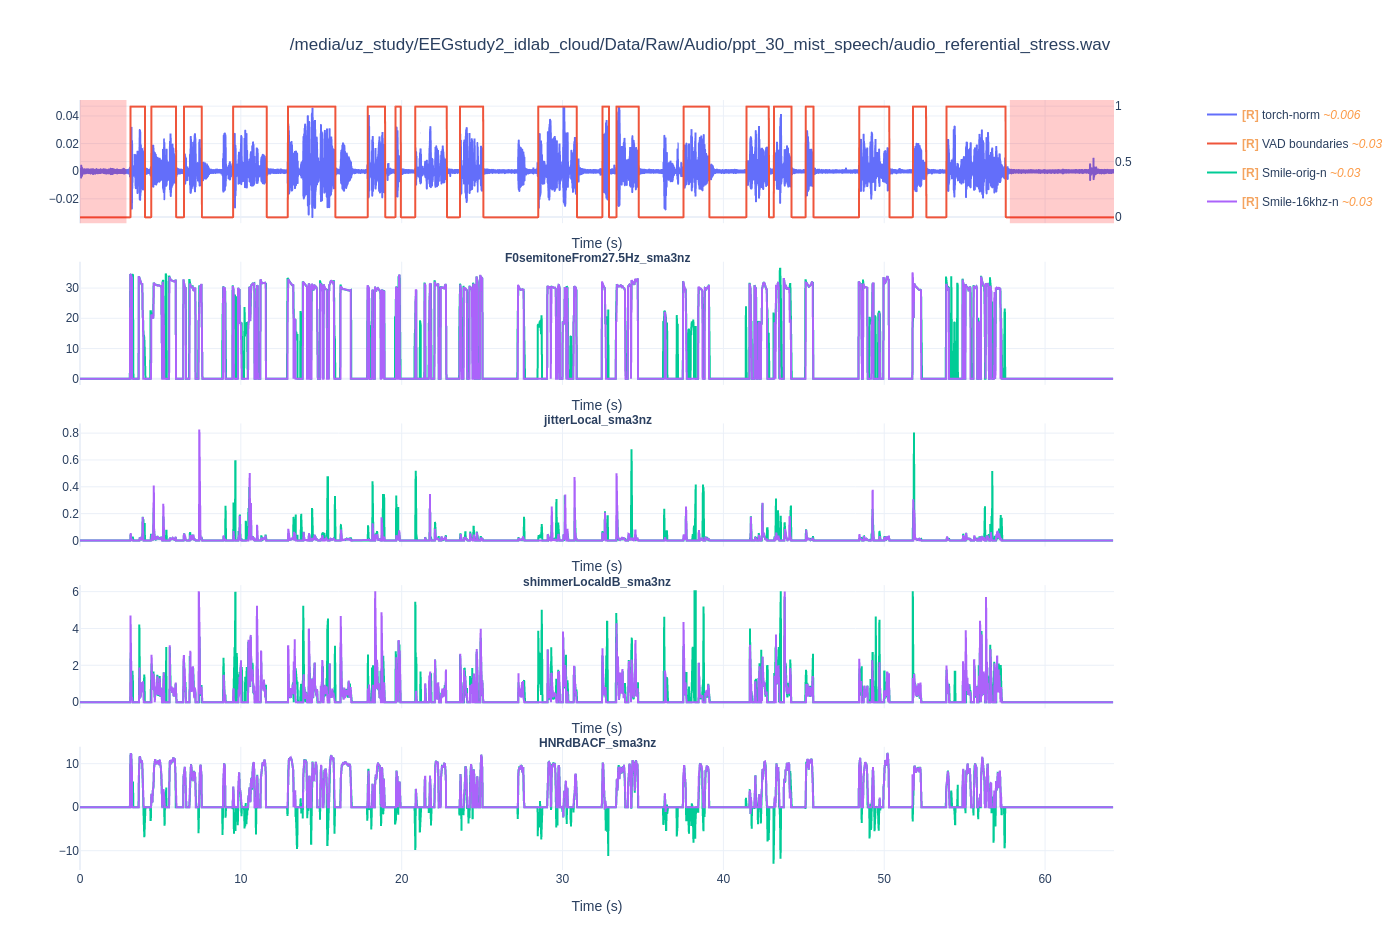

In [12]:
analyze_utterance(np.random.choice(wavs, 1)[0], audio=False, plot_type='png')
